<h1><center> <font color='black'> Business Data Analytics - Practice Session_09 </font></center></h1>
<h2><center> <font color='black'> A/B Testing</font></center></h3>
<h2><center> <font color='black'> University of Tartu - Spring 2020</font></center></h3>


## Introduction

1. What is **A/B** testing, and why you should care?
    * `A/B` testing is a statistical way to compare two different `version (hypothesis)` such as **version A (default - null hypothesis)**, and **Version B (alternative hypothesis)**. A/B testing is used not only for which version performs better, but also to test if the difference between the two version is statisticlly significant **(level of significant)** or not.

    * Businessses think that they understnd how the customer will behave, but in reality customers would behave much different than what would you think. 

    * In order to A/B testing for work we should define the **criteria of success** (Conversion rate - Newsletters sign-ups) before you begin your test, **what is your hypothesis**, or what do you think will happen by changing to Version B. Also we need to identify how many peopole **(Sample)** should we use to get significant results. 
    
    * **For example,** you compare two different `web pages` or two different newsletters. 

    
    
### What Is A Conversion Rate?

1. The conversion rate is the number of conversions divided by the total number of visitors. For example, if an e-commerce site receives 200 visitors in a month and has 50 sales, the conversion rate would be 50 divided by 200, or 25%.

2. A conversion can refer to **any desired action that you want the user to take.** This can include anything from a `click on a button` to `making a purchase and becoming a customer`. Websites and apps often have multiple conversion goals, and each will have its own conversion rate.




## Today's session:

* During today’s practice, we will investigate how to perform `A/B` Testing. broadly speaking, A/B tests are run mostly on two types of data:

    1.1 **Continuous**:for example, conversion rates, the **t-test** is most frequently used.
    
    1.2 **discrete**: Pearson’s **Chi-squared test ($𝑋^2$ test).** is the obvious choice. 
    
    
   
    
* In today's session, we will talk about `two versions (A/B) of a web site`, each version has different `layout, and page design.` and we will apply the A/B testing to check which version attracts more users or visitors or customers. 


* We will use many different test as follow: 
    * **parametric tests** - they have assumptions about distributions `(T-test)`.
    * How to check the normality of data `(QQplot, AD-Test, and Shapiro test)`
    * **non-parametric,** where you can forget about the distribution assumptions `(wilcoxon test).`
    * Power of the test
    * Test of proportions ($𝑋^2$ test)
    * CD - Diagram





### Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # For creating plots
%matplotlib inline 


#Let's make this notebook reproducible, you can use any number ex = 42
np.random.seed(42)


# set plot style for all plots
plt.style.use('ggplot')




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the data

Let us take a look at the following data:

In [2]:
# dt = df
df  = pd.read_csv('ab_clicks.csv', sep='\t')
df.head(100)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
...,...,...,...,...,...,...
95,15,div,"Explore the world, explore the past Science & ...",3,True,Connect
96,47,span,nav-item-dot,3,True,Connect
97,49,a,nav-item,3,True,Connect
98,65,form,Search,3,True,Connect


1. **Element_ID:** we have different elemetns (links) in our web page. 

2. **Tag_name:** from HTML for web development.

3. **Name:** we have a name for each elemnt.

4. **No_clicks:** how many clicks that different users perform for each element.

5. **Visible:** Element is visible or not.

6. **Version:** our element belongs to which version.

## Let's understand our data

In [3]:
# check for missing values or unclean data
df.isnull().sum()

Element_ID    0
Tag_name      0
Name          0
No_clicks     0
Visible       0
Version       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Element_ID  299 non-null    int64 
 1   Tag_name    299 non-null    object
 2   Name        299 non-null    object
 3   No_clicks   299 non-null    int64 
 4   Visible     299 non-null    bool  
 5   Version     299 non-null    object
dtypes: bool(1), int64(2), object(3)
memory usage: 12.1+ KB


#### Let’s look ad unique values in the data:

* Amout of different html elements:

In [5]:
# unique html elements

print(f"We have {len(df.Element_ID.unique())} unique html elements ")


We have 108 unique html elements 


* What different tags are there:

In [6]:
print(f"Tags: \n\n {df.Tag_name.unique()}")

Tags: 

 ['area' 'a' 'input' 'button' 'span' 'p' 'div' 'form' 'img' 'ul' 'li'
 'object' 'center' 'strong' 'font']


In [7]:
print(f"Valuese for feature Visible: {df.Visible.unique()}")

Valuese for feature Visible: [False  True]


In [8]:
print(f"Numbers of versions is {len(df.Version.unique())}: {df.Version.unique()}")

Numbers of versions is 5: ['Interact' 'Connect' 'Learn' 'Help' 'Services']


This is the cleaned version of the data from [University of Montana](https://scholarworks.montana.edu/xmlui/handle/1/3507) University of Montana explored that the button `Interact` on their page is heavily underused. They surveyed the problem by conducting questionnaires and realized that the name might be one of the reasons being too intimidating. They came up with several other **versions:**

1. Interact version.
2. Connect version.
3. Help. 
4. Services.
5. Learn.

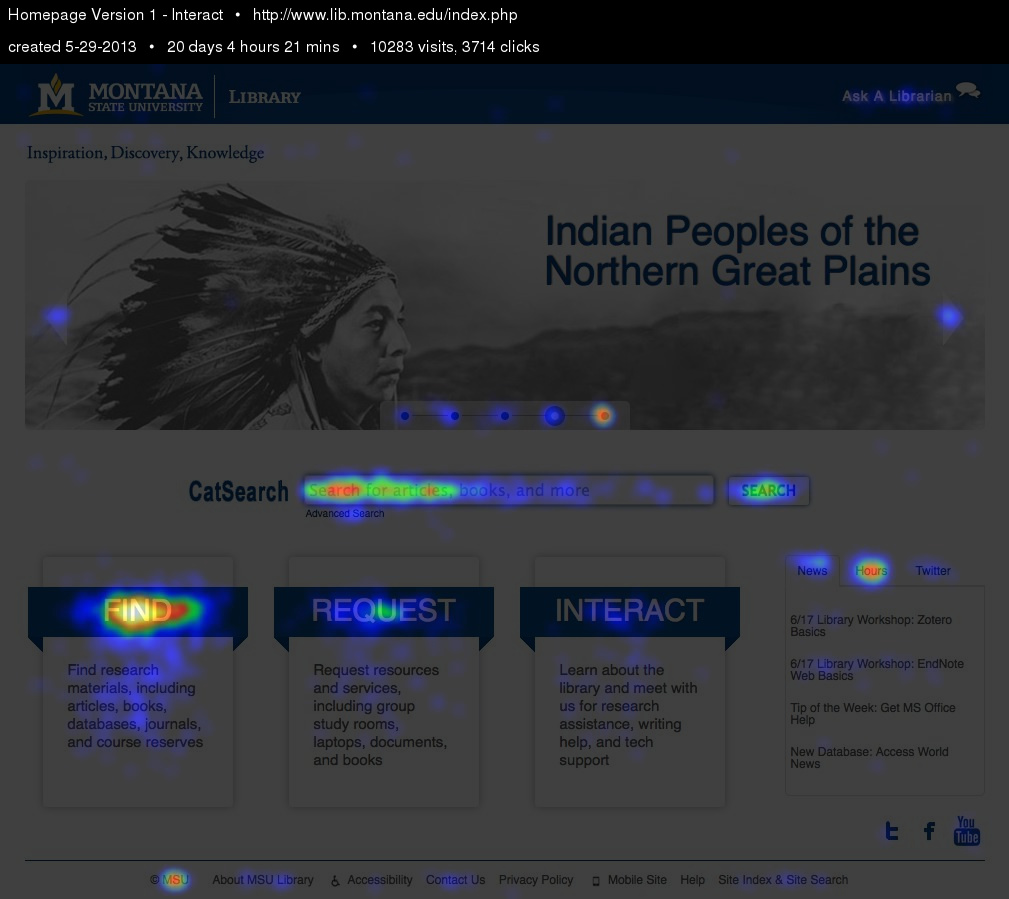

In [9]:
from IPython.display import Image
Image(filename='5.jpg') 


In the above image they noticed that the button **Interact** is rarely clicked and the decision to make different versions from this web page and apply the A/B testing to check if the difference between the two versions is statistically significant or not. 

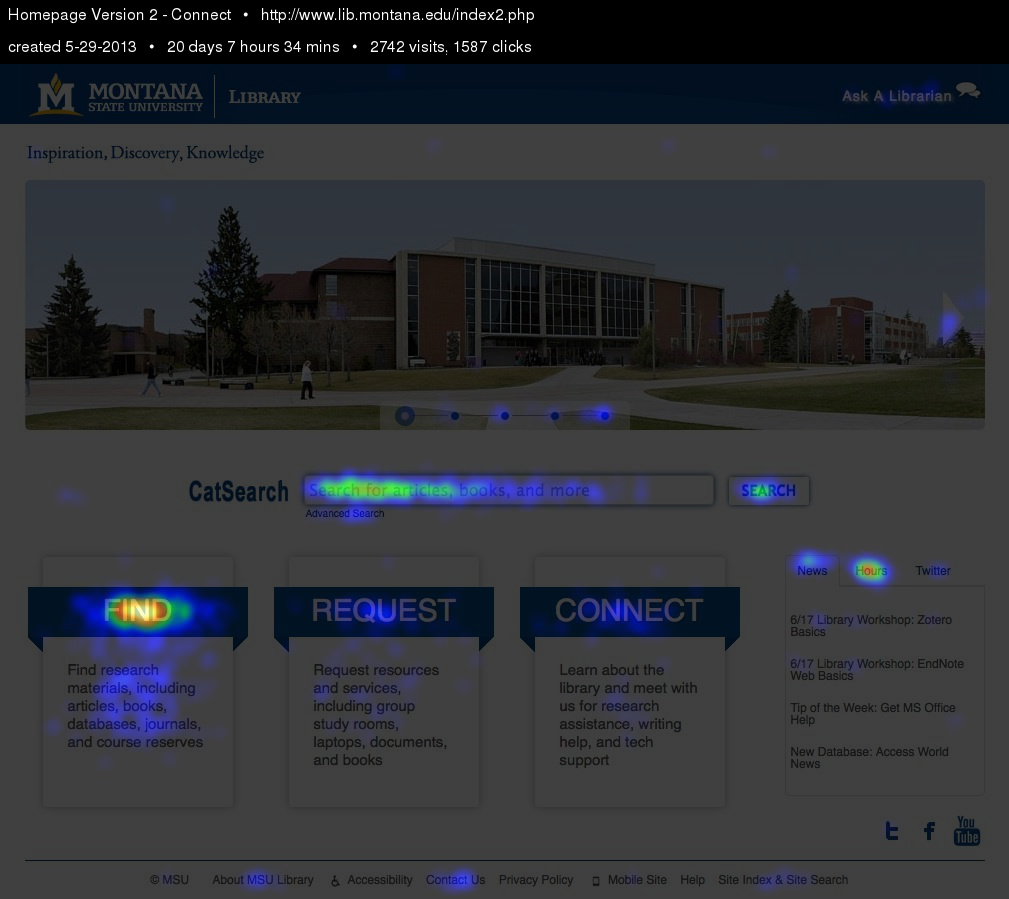

In [10]:
Image(filename='4.jpg') 

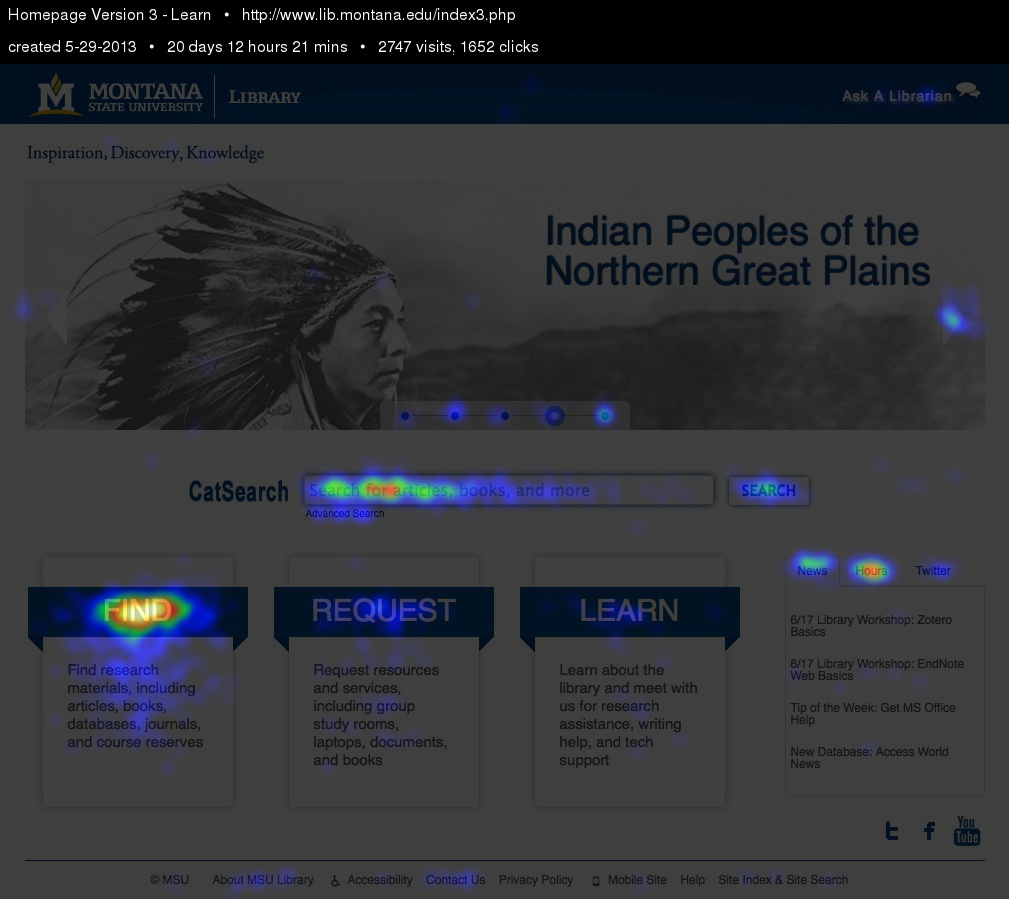

In [11]:
Image(filename='3.jpg') 

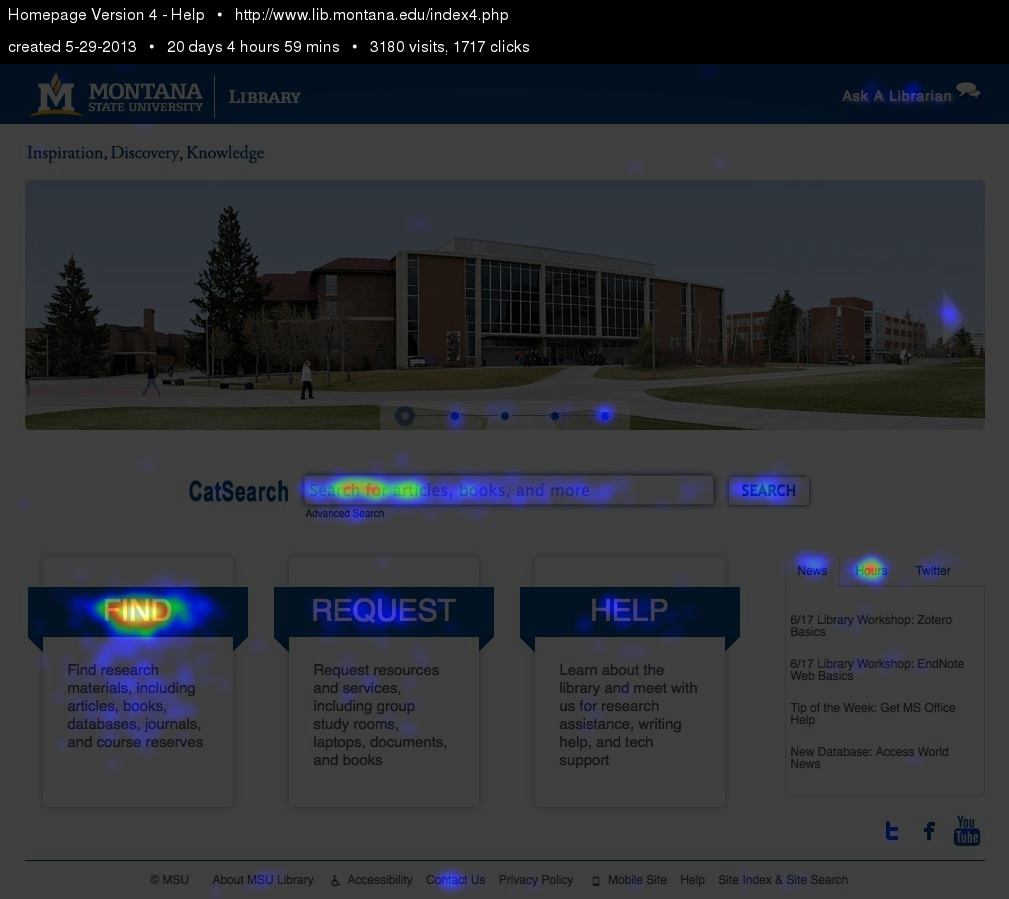

In [12]:
Image(filename='2.jpg') 

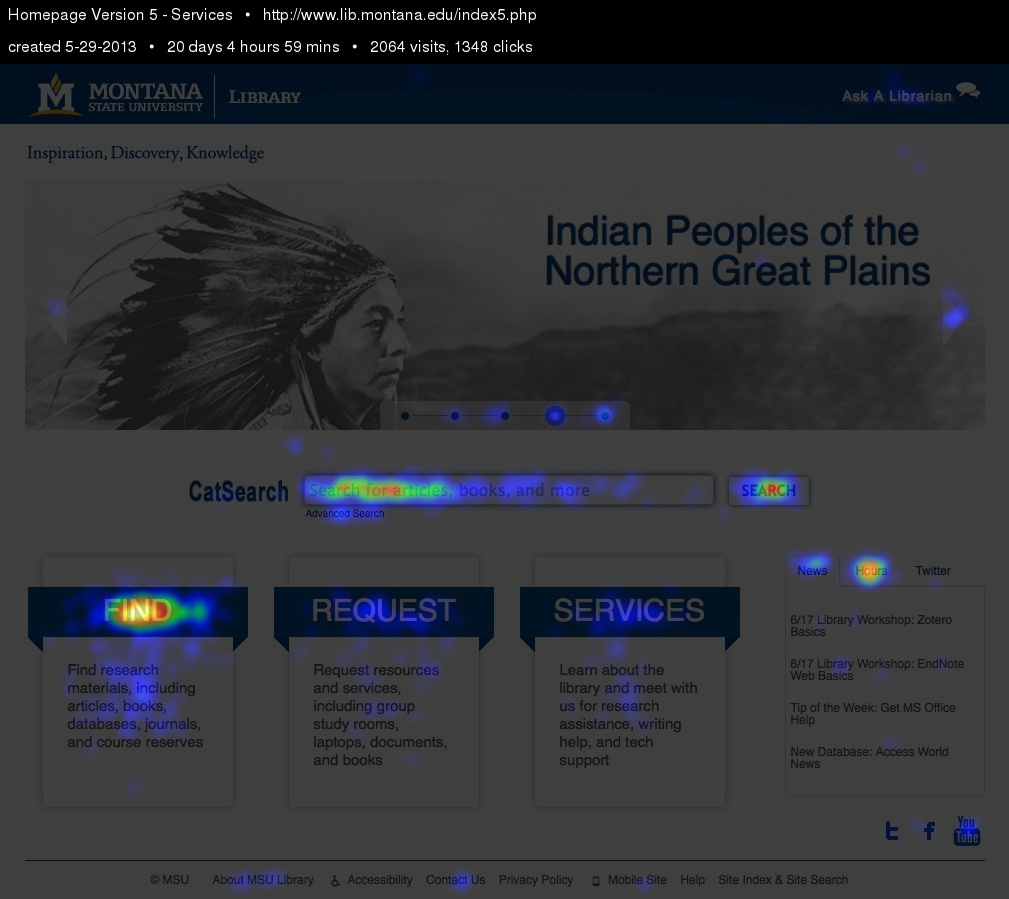

In [13]:
Image(filename='i.jpg') 

## Let's explore our data and do some plots

* First, we have to look at the amount of the clicks on the sites on all buttons:

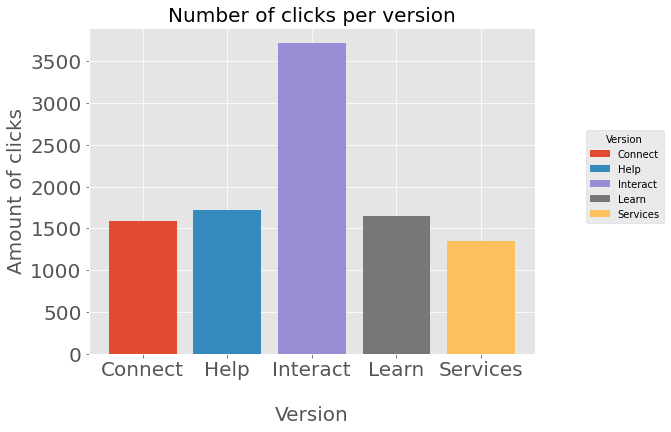

In [14]:
# group data by Version
groups = df.groupby('Version')

# Plot 
fig, ax = plt.subplots(figsize=(8, 6))

clicks =[] # clicks for each version
# plot line for each customer 
for Version, group in groups:
    ax.bar(group.Version, sum(group.No_clicks), label=Version)
    clicks.append(sum(group.No_clicks))
    


# Make our graph cool, and understandable

# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.3, 0.7), title="Version",)


    
# set titles for figure, x, y
plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()



* Based on this plot, we can say that in the data we have version of the site with `Interact` button has more clicks in total than others.


In [15]:
clicks = []
for Version,group in groups:
    clicks.append(sum(group.No_clicks))
    print(f"no of clicks in version: {Version} is {sum(group.No_clicks)}")
    
clicks

no of clicks in version: Connect is 1587
no of clicks in version: Help is 1717
no of clicks in version: Interact is 3714
no of clicks in version: Learn is 1652
no of clicks in version: Services is 1348


[1587, 1717, 3714, 1652, 1348]

* Let’s take amount of the clicks on the button Interact at the different sites and plot it.

* First we have to find ids of the elements that is used for button Interact in different versions:

In [16]:
df.head()

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact


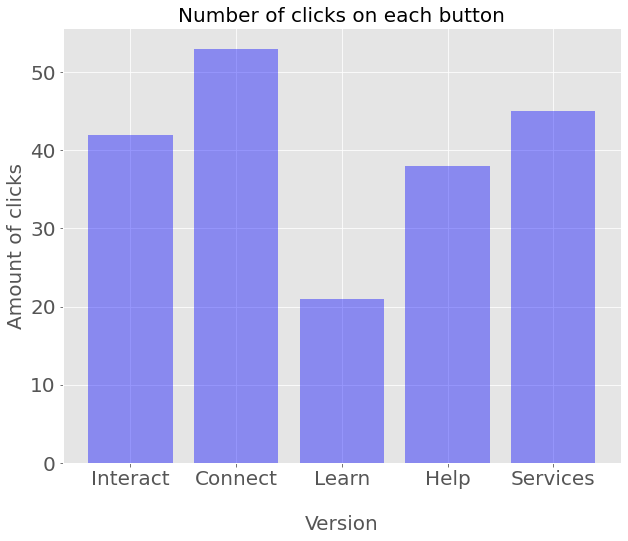

In [17]:
# filter our data based on buttons name
btn_names = ["INTERACT", "LEARN", "CONNECT", "HELP", "SERVICES"] # btn Interact with different names 

newdf = df[df['Name'].isin(btn_names)] # filter data based on btn names 


# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(newdf.Version, newdf.No_clicks, color='b', alpha = 0.4)
    
    
# set titles for figure, x, y
plt.title('Number of clicks on each button',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()





* This plot contains numbe of clicks for buttons that we are interested in, In compare to the last plot we can see that Interact version has less number of clicks. 

**Now we can't say that interact version is good or not compares to others, and beacuse of that we need to apply the `A/B testing` to cheack our hypothesis:** 


## A/B testing:

we will take two diferent versions of our web site `(A (Interact)` default version, and `B (Connect)` you can chose it randomly) or based on the most closer to Interact version.

### What is our hypothesis?

1. **Null hypothesis $(H_0)$:** There is no difference between version `A: Interact` and version `B: Connect`.


2. **Alternative hupothesis $(H_a)$** there is a difference between version `A: Interact` and version `B: Connect.



### How to accept or reject the $H_0$?
1. Based on the `p-value`, and the `level of significance`. 



**p-value** is the probability of $H_0$ to be `true`, and it can be any number between $0$, and $1$.


* We can get `p-value` after applying different test statistics such as:
  * **T-test:** compare **means** of two samples
  * **F-test:** compare **variance** of two samples
  * **ANOVA:** analysis of variance

\\

<center>1)  p-value $\gt$ level of significance ($\alpha$)   : Accept $H_0$</center> 


<center>2) p-value $\lt$ level of significance ($\alpha$)   : Reject $H_0$</center> 

\\


**level of significance value ($\alpha$):** Researchers can set their value of significance based on their research. In our practice session we will set $s.v = \alpha = 0.05$


**Example:** Let's say that the `p-value` in the less used region $= 0.01$ that means this region is touched $1$ time per $100$. 

* $H_0$: Everything is equal everything is the same (Equality between less and frequent regions)
* $H_a$: the opposite of $H_0$

* p-value = $0.1$: means $10$ out of $100$, null hypothesis will be true. 
* p-value = $0.3$: means $30$ out of $100$, null hypothesis will be true.
* p-value = $0.05$: means $5$ out of $100$, null hypothesis will be true.



<center>* p-value = $0.01$, $\alpha= 0.05$</center> 

 <center>* $0.01$ $\lt$ $0.05$</center> 
 <center>* Reject $H_0$</center> 

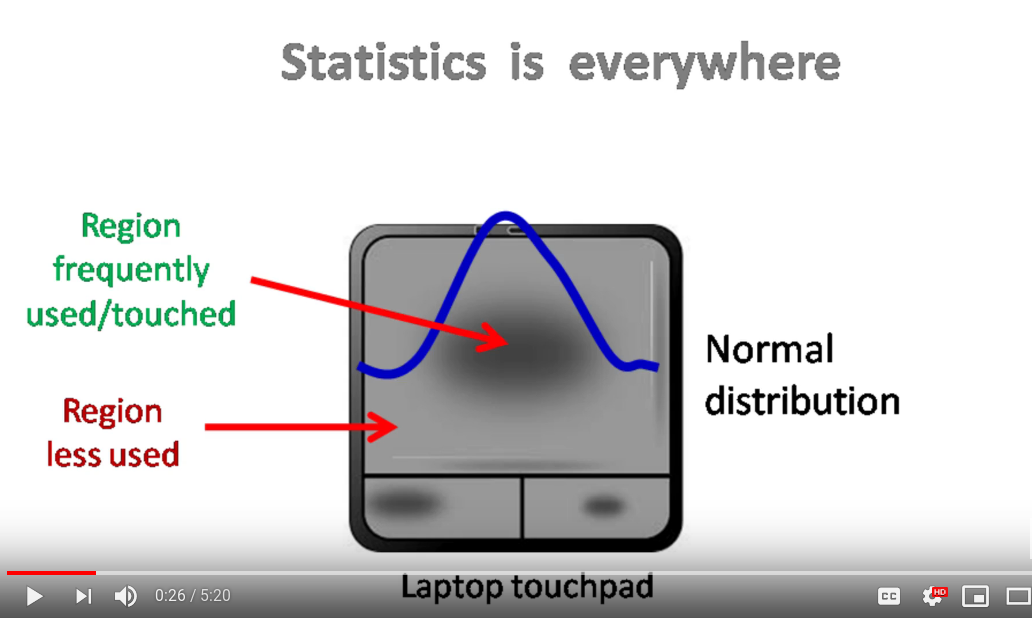

In [18]:
Image(filename='stat.png') 

# https://www.youtube.com/watch?v=3viE4s-Xm7U

## t-testing

**What is t-test?**

* The `t-test` (also called Student’s T Test) compares **two averages (means)** between two verions. `T-test assumes taht both samples are normally distributed` and tells us if they are different from each other. The t-test also tells us how significant the differences are; In other words it lets us know if those differences could have happened by chance.

* Let’s try to perform t-test like many people do (A is default and B the Connect version):

In [19]:
# filter data by Tag_name == area
# df_filter = df_cleaned
df_filter =  df['Tag_name']!='area'
df_filter = df[df_filter]
df_filter

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
...,...,...,...,...,...,...
294,116,div,Â© MSU About MSU Library Accessibility Contact...,1,True,Services
295,130,div,lib.montana.edu/interact/,1,False,Services
296,131,center,lib.montana.edu/hours/,1,False,Services
297,132,font,ì§€ì €ê·€ë‹¤,1,False,Services


In [20]:
# get only data about our two version Interact, and Connect
df_interact_connect = (df_filter['Version']=='Interact') | (df_filter['Version']=='Connect')
df_interact_connect = df_filter[df_interact_connect]

df_interact_connect.head(10)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
6,62,button,Search,101,True,Interact
7,118,a,MSU,55,True,Interact
8,50,span,nav-item-dot,46,True,Interact
9,87,a,INTERACT,42,True,Interact
10,76,a,lib.montana.edu/request/,38,True,Interact


In [21]:
from plotly.figure_factory import create_table as ct

# to get different test statistics in python 
from scipy import stats
import scipy

sample1_interact = df_interact_connect[df_interact_connect['Version']=='Interact']
sample2_connect = df_interact_connect[df_interact_connect['Version']=='Connect']



twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_connect['No_clicks'])

if twosample_results[1] < 0.05: 
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

In [22]:
import numpy as np, statsmodels.stats.api as sms


cm = sms.CompareMeans(sms.DescrStatsW(sample2_connect['No_clicks']), sms.DescrStatsW(sample1_interact['No_clicks']))
print (f"95 percent confidence interval:\n{cm.tconfint_diff(usevar='unequal')}\n")
       
       
print(f"Sample esitimate:\nmean in group Connect: {sample2_connect['No_clicks'].mean()}\nmean in group Interac:\
      {sample1_interact['No_clicks'].mean()}")

95 percent confidence interval:
(-45.370634785418446, 26.87785872762691)

Sample esitimate:
mean in group Connect: 26.385964912280702
mean in group Interac:      35.63235294117647


**T,** the greater the evidence against the null hypothesis. This means there is greater evidence that there is a significant difference. `The closer T is to 0, the more likely there isn't a significant difference.`

* What can we conclude from results above? Did we performed the test correctly? `because t-test assumes data is normally distributed`. 

## How to check the distribution of data?

#### Let’s check wether amount of clicks is gaussian distribution.
1. Plot the distribution of the data.
2. using `QQplot`
3. `AD-Test` (Anderson Darling test)
4. `Shapiro test`



### Plot the distribution of the data.

Text(0.5, 1.0, 'Distribution of No_clicks')

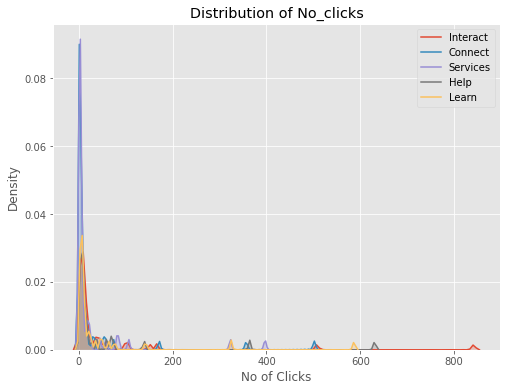

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Learn') ],
                ax =ax,  shade= True)
   


ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
#ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')


Text(0.5, 1.0, 'Distribution of No_clicks')

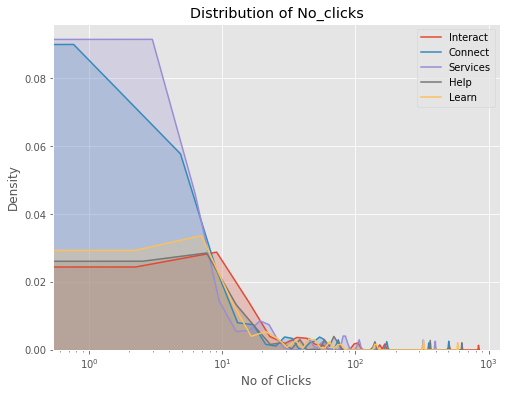

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Learn') ],
                ax =ax,  shade= True)
   


ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

Now it's easier to see that our data has `no normal distribution.` 




## QQ-plot
1. Another way to check  the normality for your data is to plot the `QQ plot`

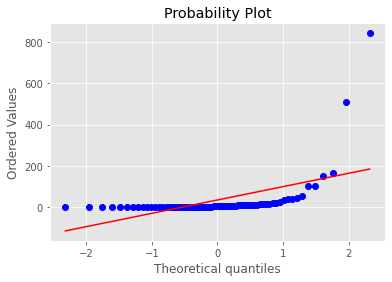

In [25]:
# import numpy as np 
#import pylab 
import scipy.stats as stats

stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == 'Interact'], dist="norm", plot=plt)


plt.show()

1. `y-axis:` sample of quantiles from your data. 
2. `x-axis:` theirotical quantiles. 
    
    
3. This plot specify the actual probability of distribution, and if we have a normal distribution for our data then this line should has angle $=45$, **diogonal line.**


Statistical tests for normality can be easily formulated in the framework of hypothesis testing. The null hypothesis is that the data is normally distributed. Here is the catch: we assume it by default, we are not trying to prove this. Basically, **we can only reject (or accept) the null hypothesis** that data is not statistically distributed (if it is not significant, it is either normally distributed or we do not have enough data to reject it).

## AD test:

1. Based on this test we will compare the significance value with respect to criticle value from the test 

In [26]:
#stats.anderson
ad_test = scipy.stats.anderson(sample1_interact['No_clicks'])


matrix_twosample = [
    ['', 'AD-test Statistic', 'critical_values'],
    ['Sample Data', ad_test[0], ad_test[1]]
]

ad_table = ct(matrix_twosample, index=True)
ad_table

#twosample_results.critical_values

In [27]:
for i in range(len(ad_test.critical_values)):
    sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
    if ad_test.statistic < ad_test.critical_values[i]:
        print(f'ad_test.significance_level: {sl}\ncritical_value {cv}: \n, data looks normal (fail to reject H0)\n')
    else:
        print(f'ad_test.significance_level: {sl}\ncritical_value {cv}: \n, data does not look normal (reject H0)\n')

ad_test.significance_level: 15.0
critical_value 0.547: 
, data does not look normal (reject H0)

ad_test.significance_level: 10.0
critical_value 0.623: 
, data does not look normal (reject H0)

ad_test.significance_level: 5.0
critical_value 0.747: 
, data does not look normal (reject H0)

ad_test.significance_level: 2.5
critical_value 0.871: 
, data does not look normal (reject H0)

ad_test.significance_level: 1.0
critical_value 1.037: 
, data does not look normal (reject H0)



## shapiro

In [28]:


shapiro_test = scipy.stats.shapiro(sample1_interact['No_clicks'])


matrix_twosample = [
    ['', 'shapiro_test', 'p-value'],
    ['Sample Data', shapiro_test[0], shapiro_test[1]]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

### What to do when the data is not gaussian (not normally distributed)? 

1. There are two large groups of tests: 
    * **parametric** - they have assumptions about distributions `(T-test)`. 
    * **non-parametric**, where you can forget about the distribution assumptions `(wilcoxon test)`. 
    

#### How to test non gaussain data?


1. `wilcoxon test` (no normality assumption)



## wilcoxon test

In [29]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# seed the random number generator
seed(1)


# compare samples
stat, p = wilcoxon(df_interact_connect['No_clicks'])
print(f'Statistics= {stat}, p-value= {p}')

matrix_twosample = [
    ['', 'wilcoxon_test', 'p-value'],
    ['Sample Data', stat, p]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table



Statistics= 0.0, p-value= 2.215141881417568e-22


In [30]:
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


* Or we can use transform No_clicks to log10:

In [31]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# seed the random number generator
seed(1)


# compare samples
stat, p = wilcoxon(np.log10(df_interact_connect['No_clicks']))
print(f'Statistics= {stat}, p-value= {p}')

matrix_twosample = [
    ['', 'wilcoxon_test', 'p-value'],
    ['Sample Data', stat, p]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table



Statistics= 0.0, p-value= 1.6393487560214566e-16


## Power of the test


#### how many samples you need with respect to significance, power and effect size:

1. Currently, we do not have the possibility to plan the experiment and make decisions about the sample sizes. In real-life, you first need to calculate how many samples you need with respect to significance, power and effect size:


In [0]:
# # estimate sample size via power analysis
# from statsmodels.stats.power import TTestIndPower


# # parameters for power analysis
# effect = 0.2 # difference between the two means divided by the standard deviation.
# alpha = 0.05
# power = 0.8  # type 2 II error with 80% probability


# # https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestPower.solve_power.html
# # perform power analysis
# analysis = TTestIndPower()

# result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
# print('Sample Size: %.3f' % result)

1. **Power** of the test, e.g. 0.8, is one minus the probability of a `type II error` ($H_0$ is accepted and in reality it should be rejected). **Power** is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.


In [33]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower


# parameters for power analysis
effect = 0.2 #  difference between the two means divided by the standard deviation.
alpha = 0.05
power = 0.8 #  is one minus the probability of a type II error


# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power,  alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 393.406


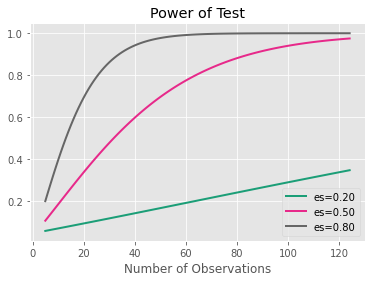

In [34]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower


# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 125))


# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

### Test of proportions: 

1. The hypothesis that in general one version of the page is more clicked than another one is quite optimistic. 


2. Let’s narrow down our hypothesis. What if we want to check whether the number of times clicked on this component `(Connect)` out of all clicks to this page is signifcantly `better (worse) than` the same proportion of clicks in the `default version (Interact)`? Here we test **proportions.**

3. Chi-squared test **($𝑋^2$ test).**

In [35]:
clicks

[1587, 1717, 3714, 1652, 1348]

In [36]:
# total number of clicks
# we have clicks for each version from above cells
total_clicks = sum(clicks)
print(total_clicks)

prop = []
for c in clicks:
    prop.append(c/total_clicks)

print(prop)

mydict = {
    "Version": ["Connect","Help","Interact","Learn","Services"],
    "total_clicks_visited": clicks
}

df1 = pd.DataFrame(mydict)
df1

10018
[0.15841485326412458, 0.1713914953084448, 0.370732681173887, 0.16490317428628468, 0.13455779596725895]


,Version,total_clicks_visited
0,Connect,1587
1,Help,1717
2,Interact,3714
3,Learn,1652
4,Services,1348


In [37]:
newdf

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
9,87,a,INTERACT,42,True,Interact
75,92,a,CONNECT,53,True,Connect
137,87,a,LEARN,21,True,Learn
196,92,a,HELP,38,True,Help
253,87,a,SERVICES,45,True,Services


In [0]:
# clicks

In [0]:
# prop

In [40]:
left_join_df = newdf.merge(df1, on='Version', how='left')

left_join_df['proportions'] = left_join_df["No_clicks"]/left_join_df['total_clicks_visited']

left_join_df

,Element_ID,Tag_name,Name,No_clicks,Visible,Version,total_clicks_visited,proportions
0,87,a,INTERACT,42,True,Interact,3714,0.011309
1,92,a,CONNECT,53,True,Connect,1587,0.033396
2,87,a,LEARN,21,True,Learn,1652,0.012712
3,92,a,HELP,38,True,Help,1717,0.022132
4,87,a,SERVICES,45,True,Services,1348,0.033383


Versions that we are interested in is Interact and connect

In [41]:
left_join_df.iloc[0:2]['No_clicks']

0    42
1    53
Name: No_clicks, dtype: int64

In [42]:
from scipy import stats

import numpy as np

interact_connect = np.array([left_join_df.iloc[0:2]['No_clicks']\
                      , left_join_df.iloc[0:2]['total_clicks_visited']])

# print(stats.chi2_contingency(survivors))

chi2_stat, p_val, dof, ex = stats.chi2_contingency(interact_connect)

print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)
 

===Chi2 Stat===
28.273094325123743


===Degrees of Freedom===
1


===P-Value===
1.0535017776345046e-07


===Contingency Table===
[[  66.12676056   28.87323944]
 [3689.87323944 1611.12676056]]


* There are many tests, but all of them fit into the general framework!

# Critical Difference Diagrams:

* Imagine that you're working on many data sets for a classification problem, and want to try to use different classification algorithms such as rf, logit, xgboost, and so on. `Can we test these classifiers to see if it has a significant difference statistically or not?`. The Answer is yes!


### nemenyi: Friedman and Nemenyi tests;

In [43]:
# sample data:

df = pd.read_csv('example.csv')
df


,classifier_name,dataset_name,accuracy
0,clf3,dataset1,0.819780
1,clf3,dataset2,0.803069
2,clf3,dataset3,0.840000
3,clf3,dataset4,0.700000
4,clf3,dataset5,0.850000
...,...,...,...
70,clf2,dataset11,0.928571
71,clf2,dataset12,0.596000
72,clf2,dataset13,0.620513
73,clf2,dataset14,0.658974


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


\classifier_name:
['clf3' 'clf5' 'clf1' 'clf4' 'clf2']
the null hypothesis over the entire classifiers rejected

average_ranks:
clf1    4.200000
clf2    3.766667
clf4    3.500000
clf5    2.000000
clf3    1.533333
dtype: float64

p_values:
('clf2', 'clf3', 0.0007229186187432429, True)
('clf1', 'clf3', 0.0008052762369668134, True)
('clf2', 'clf5', 0.0008052762369668134, True)
('clf3', 'clf4', 0.0008685535665822177, True)
('clf1', 'clf5', 0.002610776740525937, True)
('clf4', 'clf5', 0.002854354799586081, True)
('clf1', 'clf4', 0.019877958489914162, False)
('clf1', 'clf2', 0.06914397389751895, False)
('clf2', 'clf4', 0.22194815136169888, False)
('clf3', 'clf5', 0.36076268578167103, False)

nnames:
Index(['clf1', 'clf2', 'clf4', 'clf5', 'clf3'], dtype='object')
[0, 1, 2]
[3, 4]


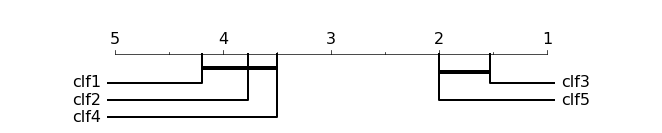

In [44]:
# Author: Hassan Ismail Fawaz <hassan.ismail-fawaz@uha.fr>
#         Germain Forestier <germain.forestier@uha.fr>
#         Jonathan Weber <jonathan.weber@uha.fr>
#         Lhassane Idoumghar <lhassane.idoumghar@uha.fr>
#         Pierre-Alain Muller <pierre-alain.muller@uha.fr>
# License: GPL3

# https://github.com/hfawaz/cd-diagram

import numpy as np
import pandas as pd
import matplotlib

matplotlib.use('agg')
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'

import operator
import math
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
import networkx

# inspired from orange3 https://docs.orange.biolab.si/3/data-mining-library/reference/evaluation.cd.html
def graph_ranks(avranks, names, p_values, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.

    Needs matplotlib to work.

    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.

    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
    """
    try:
        import matplotlib
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.

        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]

        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    nnames = names
    ssums = sums

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]

    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05
    linewidth = 2.0
    linewidth_sign = 4.0

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom", size=16)

    k = len(ssums)

    def filter_names(name):
        return name

    space_between_names = 0.24

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=linewidth)
        text(textspace - 0.2, chei, filter_names(nnames[i]), ha="right", va="center", size=16)

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=linewidth)
        text(textspace + scalewidth + 0.2, chei, filter_names(nnames[i]),
             ha="left", va="center", size=16)

    # no-significance lines
    def draw_lines(lines, side=0.05, height=0.1):
        start = cline + 0.2

        for l, r in lines:
            line([(rankpos(ssums[l]) - side, start),
                  (rankpos(ssums[r]) + side, start)],
                 linewidth=linewidth_sign)
            start += height
            print('drawing: ', l, r)

    # draw_lines(lines)
    start = cline + 0.2
    side = -0.02
    height = 0.1

    # draw no significant lines
    # get the cliques
    cliques = form_cliques(p_values, nnames)
    i = 1
    achieved_half = False
    print(f"\nnnames:\n{nnames}")
    for clq in cliques:
        if len(clq) == 1:
            continue
        print(clq)
        min_idx = np.array(clq).min()
        max_idx = np.array(clq).max()
        if min_idx >= len(nnames) / 2 and achieved_half == False:
            start = cline + 0.25
            achieved_half = True
        line([(rankpos(ssums[min_idx]) - side, start),
              (rankpos(ssums[max_idx]) + side, start)],
             linewidth=linewidth_sign)
        start += height


def form_cliques(p_values, nnames):
    """
    This method forms the cliques
    """
    # first form the numpy matrix data
    m = len(nnames)
    g_data = np.zeros((m, m), dtype=np.int64)
    for p in p_values:
        if p[3] == False:
            i = np.where(nnames == p[0])[0][0]
            j = np.where(nnames == p[1])[0][0]
            min_i = min(i, j)
            max_j = max(i, j)
            g_data[min_i, max_j] = 1

    g = networkx.Graph(g_data)
    return networkx.find_cliques(g)


def draw_cd_diagram(df_perf=None, alpha=0.05):
    """
    Draws the critical difference diagram given the list of pairwise classifiers that are
    significant or not
    """
    p_values, average_ranks, _ = wilcoxon_holm(df_perf=df_perf, alpha=alpha)

    #print(average_ranks)

#     for p in p_values:
#         print(p)

    graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
                cd=None, reverse=True, width=9, textspace=1.5)

    plt.savefig('cd-diagram.png',bbox_inches='tight')

def wilcoxon_holm(alpha=0.05, df_perf=None):
    """
    Applies the wilcoxon signed rank test between each pair of algorithm and then use Holm
    to reject the null's hypothesis
    """
    print(f"\classifier_name:\n{pd.unique(df_perf['classifier_name'])}")
    # count the number of tested datasets per classifier
    df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['classifier_name']).size()}).reset_index()
    # get the maximum number of tested datasets
    max_nb_datasets = df_counts['count'].max()
    # get the list of classifiers who have been tested on nb_max_datasets
    classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['classifier_name'])
    # test the null hypothesis using friedman before doing a post-hoc analysis
    friedman_p_value = friedmanchisquare(*(
        np.array(df_perf.loc[df_perf['classifier_name'] == c]['accuracy'])
        for c in classifiers))[1]
    if friedman_p_value >= alpha:
        # then the null hypothesis over the entire classifiers cannot be rejected
        print('the null hypothesis over the entire classifiers cannot be rejected')
    else:
        print('the null hypothesis over the entire classifiers rejected')
          
        exit()
    # get the number of classifiers
    m = len(classifiers)
    # init array that contains the p-values calculated by the Wilcoxon signed rank test
    p_values = []
    # loop through the algorithms to compare pairwise
    for i in range(m - 1):
        # get the name of classifier one
        classifier_1 = classifiers[i]
        # get the performance of classifier one
        perf_1 = np.array(df_perf.loc[df_perf['classifier_name'] == classifier_1]['accuracy']
                          , dtype=np.float64)
        for j in range(i + 1, m):
            # get the name of the second classifier
            classifier_2 = classifiers[j]
            # get the performance of classifier one
            perf_2 = np.array(df_perf.loc[df_perf['classifier_name'] == classifier_2]
                              ['accuracy'], dtype=np.float64)
            # calculate the p_value
            p_value = wilcoxon(perf_1, perf_2, zero_method='pratt')[1]
            # appen to the list
            p_values.append((classifier_1, classifier_2, p_value, False))
    # get the number of hypothesis
    k = len(p_values)
    # sort the list in acsending manner of p-value
    p_values.sort(key=operator.itemgetter(2))

    # loop through the hypothesis
    for i in range(k):
        # correct alpha with holm
        new_alpha = float(alpha / (k - i))
        # test if significant after holm's correction of alpha
        if p_values[i][2] <= new_alpha:
            p_values[i] = (p_values[i][0], p_values[i][1], p_values[i][2], True)
        else:
            # stopclassifiers
            break
    # compute the average ranks to be returned (useful for drawing the cd diagram)
    # sort the dataframe of performances
    sorted_df_perf = df_perf.loc[df_perf['classifier_name'].isin(classifiers)]. \
        sort_values(['classifier_name', 'dataset_name'])
    # get the rank data
    rank_data = np.array(sorted_df_perf['accuracy']).reshape(m, max_nb_datasets)

    # create the data frame containg the accuracies
    df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
    np.unique(sorted_df_perf['dataset_name']))

    # number of wins
    dfff = df_ranks.rank(ascending=False)
    
    #print(f"\nnumber of wins:\n{dfff[dfff == 1.0].sum(axis=1)}")

    # average the ranks
    average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
    print(f"\naverage_ranks:\n{average_ranks}")
    # return the p-values and the average ranks
    print(f"\np_values:")
    for pp in p_values:
          print(f"{pp}")
#           if friedman_p_value >= alpha:
#             # then the null hypothesis over the entire classifiers cannot be rejected
#             print('the null hypothesis over the entire classifiers cannot be rejected')
            
    return p_values, average_ranks, max_nb_datasets

df_perf = pd.read_csv('example.csv',index_col=False)

draw_cd_diagram(df_perf=df_perf)

In [0]:
df_perf = df


# count the number of tested datasets per classifier
df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['classifier_name']).size()}).reset_index()

# get the maximum number of tested datasets
max_nb_datasets = df_counts['count'].max()

# get the list of classifiers who have been tested on nb_max_datasets
classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['classifier_name'])

# get the number of classifiers
m = len(classifiers)

# compute the average ranks to be returned (useful for drawing the cd diagram)
# sort the dataframe of performances
sorted_df_perf = df_perf.loc[df_perf['classifier_name'].isin(classifiers)]. \
        sort_values(['classifier_name', 'dataset_name'])

# get the rank data
rank_data = np.array(sorted_df_perf['accuracy']).reshape(m, max_nb_datasets)

# create the data frame containg the accuracies
df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
                        np.unique(sorted_df_perf['dataset_name']))



In [46]:
df_ranks

,dataset1,dataset10,dataset11,dataset12,dataset13,dataset14,dataset15,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9
clf1,0.690110,0.901449,0.535714,0.592,0.664103,0.584615,0.638462,0.017903,0.302857,0.200000,0.50,0.5,0.233333,0.333333,0.532552
clf2,0.523077,0.266667,0.928571,0.596,0.620513,0.658974,0.612821,0.406650,0.662857,0.500000,0.75,0.9,0.766667,0.915556,0.549740
clf3,0.819780,0.864493,1.000000,0.772,0.841026,0.838462,0.858974,0.803069,0.840000,0.700000,0.85,0.9,0.900000,0.997778,0.873177
clf4,0.483516,0.848551,1.000000,0.576,0.589744,0.597436,0.630769,0.414322,0.794286,0.666667,0.85,0.8,0.800000,0.861111,0.812500
clf5,0.454945,0.837681,1.000000,0.820,0.794872,0.766667,0.802564,0.838875,0.822857,0.700000,0.90,1.0,0.900000,0.994444,0.823698


In [47]:

# average the ranks
average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
list(average_ranks)


[4.2, 3.7666666666666666, 3.5, 2.0, 1.5333333333333334]

In [0]:
#!pip install Orange3

* **Orange** is a component-based data mining software. It includes a range of data visualization, exploration, preprocessing and modeling techniques. It can be used through a nice and intuitive user interface or, for more advanced users, as a module for the Python programming language.

In [0]:
#!pip install Orange3

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


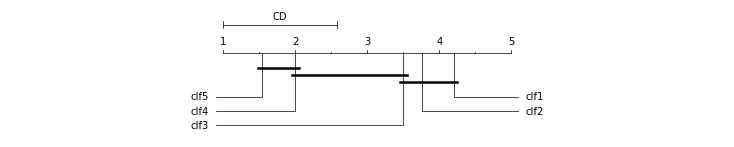

In [50]:
import Orange
import matplotlib.pyplot as plt
names = list(classifiers)
avranks = list(average_ranks)

cd = Orange.evaluation.compute_CD(avranks, max_nb_datasets) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=3)
plt.show()

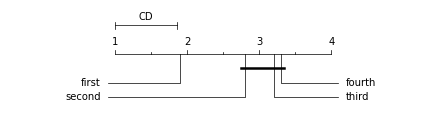

In [51]:
import Orange
import matplotlib.pyplot as plt
names = ["first", "third", "second", "fourth" ]
avranks =  [1.9, 3.2, 2.8, 3.3 ]
cd = Orange.evaluation.compute_CD(avranks, 30) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show()


https://docs.biolab.si//3/data-mining-library/reference/evaluation.cd.html

## conclusion:

* In today's session we worked with A/B testing:
    * **parametric tests** - they have assumptions about distributions `(T-test)`.
    * How to check the normality of data `(QQplot, AD-Test, and Shapiro test)`
    * **non-parametric,** where you can forget about the distribution assumptions `(wilcoxon test).`
    * Power of the test
    * Test of proportions ($𝑋^2$ test)
    * CD - Diagram


* key takeaways: 
    1. Determine the type of tests to be performed based on the data and the problem objective.
    

https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/